In [1]:
import pandas as pd
import matplotlib.pyplot as plt

이동평균 필터를 heading에 적용해보자

In [4]:
import pandas as pd

data = pd.read_csv("../../datasets/sensors/0429_heading.csv", index_col=0)

In [5]:
heading = data["field.data"]

In [7]:
heading.index = range(len(heading))

In [8]:
heading

0     -75.69
1     -74.82
2     -78.39
3     -77.15
4     -68.76
       ...  
623   -80.47
624   -86.22
625   -83.94
626   -84.82
627   -83.73
Name: field.data, Length: 628, dtype: float64

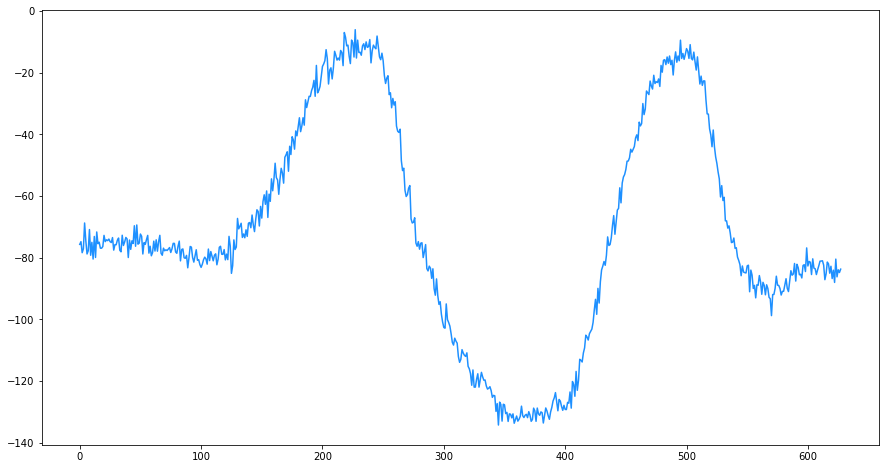

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(heading, '-', color='dodgerblue', label='original')
plt.show()

In [24]:
### 이동평균필터
def MovingAverageFilter(prev_data, n, x):
    """
    (param)     prev_data : 이전 데이터가 저장된 배열
                n : 이동평균필터 큐의 크기
                x : 새로 들어온 데이터
    (return)    avg : 이동평균
    """

    # n개의 데이터가 모이기 전까지는 무시하는 버전
    # if len(prev_data) < n:
    #     return 0

    if len(prev_data) >= n:
        prev_data.pop(0)
    prev_data.append(x)

    return sum(prev_data) / len(prev_data)

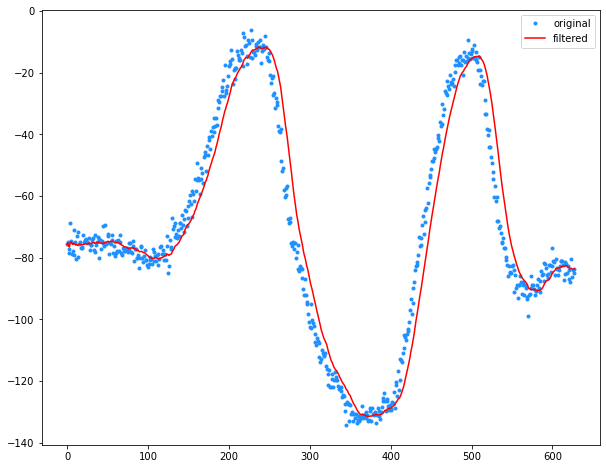

In [24]:
n = 20
prev_data = []
filtered = [MovingAverageFilter(prev_data, n, x) for x in heading]

plt.figure(figsize=(10, 8))
plt.plot(heading, '.', color='dodgerblue', label='original')
plt.plot(filtered, 'r-', label='filtered')

plt.legend()
plt.show()

In [15]:
### 저주파 통과 필터

def LowPassFilter(alpha, prev, x):
    """
    (param) alpha : weight for previous estimation
            prev : previous estimation
            x : new data
    (return) estimation
    """
    return alpha * prev + (1 - alpha) * x

In [16]:
import numpy as np

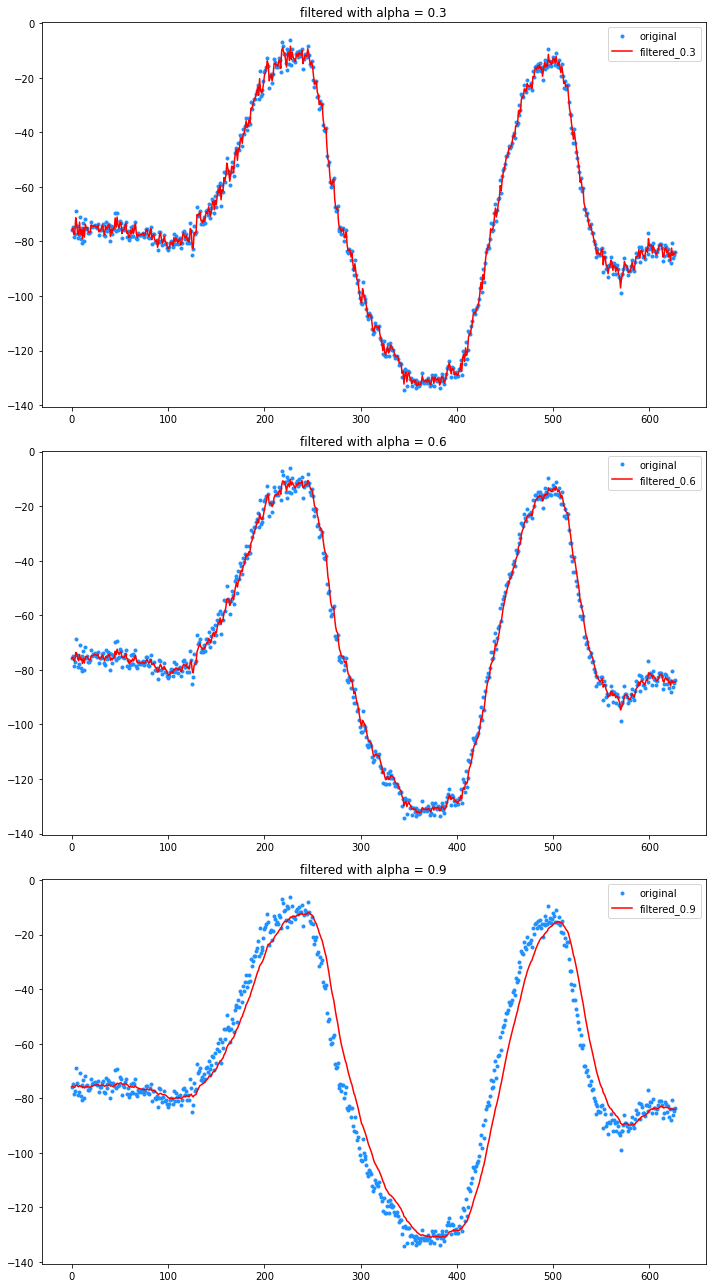

In [22]:
alpha = [0.3, 0.6, 0.9]
x_filtered = np.zeros((3, len(heading)))

plt.figure(figsize=(10, 18))

for i in range(len(alpha)):
    prev = heading[0]
    for j in range(len(heading)):
        prev = LowPassFilter(alpha[i], prev, heading[j])
        x_filtered[i][j] = prev
        
    plt.subplot(3, 1, i + 1)
    plt.title('filtered with alpha = '+str(alpha[i]))
    plt.plot(heading, '.', color='dodgerblue', label='original')
    plt.plot(x_filtered[i], 'r-', label='filtered_'+str(alpha[i]))
    plt.legend()

plt.tight_layout()
plt.show()

In [23]:
gps = pd.read_csv("../../datasets/sensors/gps.csv")
gps = gps.loc[:,['field.latitude', 'field.longitude']] #"%time",

# start_time = gps.index.min()
# gps['time'] = (gps.index - start_time) / 1000000000
# gps['time']


gps.columns=["latitude", "longitude"]
gps

,latitude,longitude
0,37.450649,126.652906
1,37.450649,126.652907
2,37.450648,126.652907
3,37.450648,126.652907
4,37.450648,126.652907
...,...,...
58,37.450722,126.652754
59,37.450722,126.652753
60,37.450722,126.652752
61,37.450722,126.652752


In [25]:
gps.shape

(63, 2)

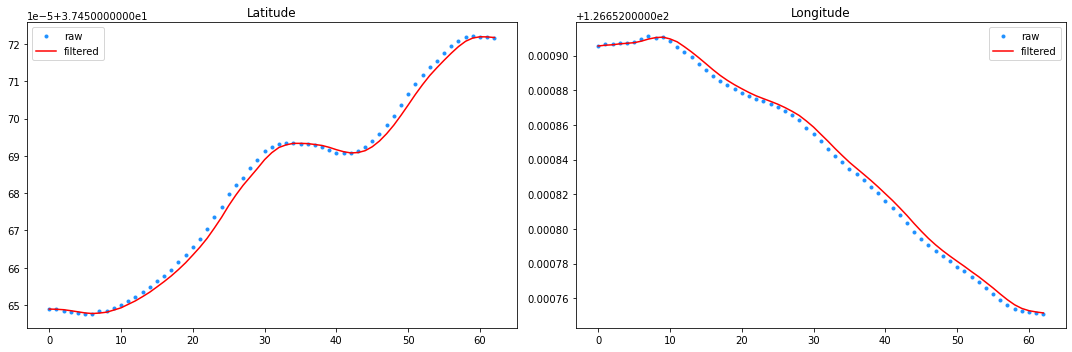

In [32]:
n = 3

plt.figure(figsize=(15, 5))


prev_data = []
lat_filtered = [MovingAverageFilter(prev_data, n, x) for x in gps.latitude]
plt.subplot(1, 2, 1)
plt.title('Latitude')
plt.plot(gps.latitude, '.', color='dodgerblue', label='raw')
plt.plot(lat_filtered, 'r-', label='filtered')
plt.legend()

prev_data = []
lon_filtered = [MovingAverageFilter(prev_data, n, x) for x in gps.longitude]
plt.subplot(1, 2, 2)
plt.title('Longitude')
plt.plot(gps.longitude, '.', color='dodgerblue', label='raw')
plt.plot(lon_filtered, 'r-', label='filtered')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
raw_data = pd.read_csv("../../datasets/sensors/imu_mag.csv")
imu_mag = raw_data.loc[:, ['field.magnetic_field.x', 'field.magnetic_field.y', 'field.magnetic_field.z']]
imu_mag.columns = ['mag_x', 'mag_y', 'mag_z']

In [7]:
imu_mag.mag_x[0]

-3.16141242981e-05

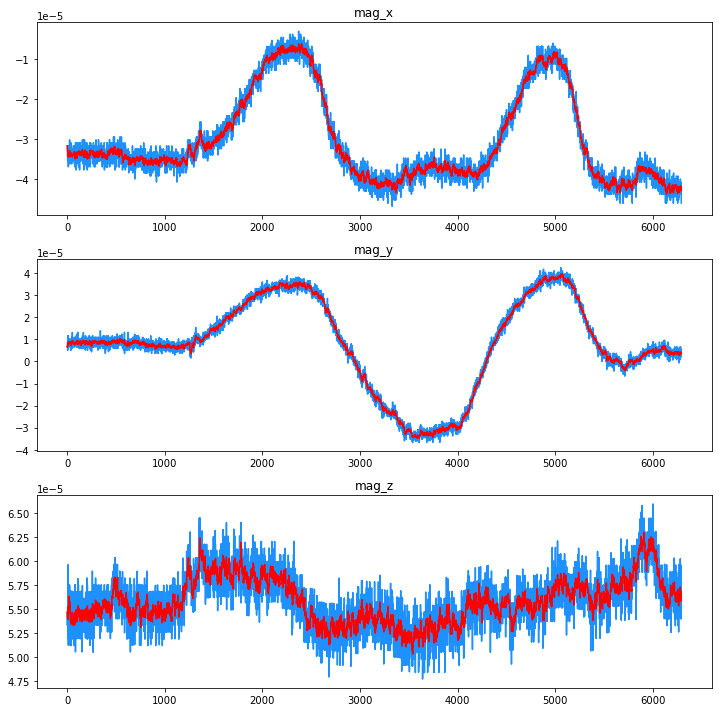

In [31]:
alpha = 0.8
fields = list(imu_mag.columns)

plt.figure(figsize=(10, 10))

for i, field_name in enumerate(fields):
    series = imu_mag.loc[:, field_name]
    prev = imu_mag.loc[0, field_name]
    filtered = []
    for data in series:
        prev = LowPassFilter(alpha, prev, data)
        filtered.append(prev)
    
    plt.subplot(3, 1, i + 1)
    plt.title(field_name)
    plt.plot(series, '-', color='dodgerblue')
    plt.plot(filtered, 'r-')

plt.tight_layout()
plt.show()